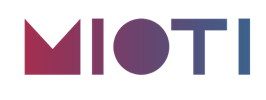
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning</center>

# Challenge S7 : Control de salud

## Objetivo

El objetivo de este challenge es entrenar un modelo para determinar el estado de salud de una persona en funcion de unas variables tomadas de la monitorizacion de 50 personas durante 31 dias tomando muestras cada hora del numero de pulsaciones por minuto, asi como el sexo, la edad y el peso de la persona. La etiqueta a predecir es el estado de salud (OK o BAD)en cada hora.


In [1]:
import datetime
import time
from datetime import timedelta
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")



### Entrenamiento del modelo

Dispones de un dataset `health.csv` que contiene varias variables y su relación con el estado de salud del paciente (emergencia o situación normal). 

Analiza, preprocesalo y entrena un modelo para luego utilizarlo más adelante. Aplica lo consideres más relevante para este caso de lo que has aprendido durante la asignatura.

### Carga del dataset

In [2]:
df = pd.read_csv('health_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      37200 non-null  int64  
 1   sex     37200 non-null  int64  
 2   age     37200 non-null  int64  
 3   weight  37200 non-null  float64
 4   day     37200 non-null  object 
 5   hour    37200 non-null  int64  
 6   bpm     37200 non-null  int64  
 7   status  37200 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.3+ MB


In [4]:
df.head()

,id,sex,age,weight,day,hour,bpm,status
0,0,1,48,92.7,2007-12-01,0,95,OK
1,0,1,48,92.7,2007-12-01,1,100,OK
2,0,1,48,92.7,2007-12-01,2,107,OK
3,0,1,48,92.7,2007-12-01,3,97,OK
4,0,1,48,92.7,2007-12-01,4,97,OK


In [5]:
df.shape  # (24*31*50 , 8)
df['status'].value_counts()

OK     36788
BAD      412
Name: status, dtype: int64

In [6]:
# Variable X
X = df[['sex','age','weight','hour','bpm']]
x = np.array(X)

# Analizar los datos

* ¿Los datos tienen estructura de serie temporal? ¿Puedes hacer una grafica de la evolucion de bpm a lo largo de todos los dias para una persona?

* Elige que atributos pueden ser utiles para un modelo de clasificacion. Elimina los que no sean utiles.
* Crea la matriz de datos de entrenamiento: X e y, y divide los datos en entrenamiento y test

#### Preprocesado de los datos

In [7]:
#Variable objetivo y
df['status'] = df['status'].map({"OK": 0, "BAD": 1})

In [8]:
df['status'].value_counts()

0    36788
1      412
Name: status, dtype: int64

In [9]:
df['status'].value_counts(normalize=True)

0    0.988925
1    0.011075
Name: status, dtype: float64

In [10]:
y = np.array(df['status'])

In [11]:
y.shape

(37200,)

#### Division entre entrenamiento y test 

In [12]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
pd.DataFrame(y_test)[0].value_counts(normalize=True)

0    0.989329
1    0.010671
Name: 0, dtype: float64

In [13]:
pd.DataFrame(y_train)[0].value_counts(normalize=True)

0    0.988726
1    0.011274
Name: 0, dtype: float64

# Entrenamiento sin ajustar los hiperparametros

* Entrena 3 modelos con los datos obtenidos anteriormente 
* Presenta los resultados sobre los conjuntos de entrenamiento y test

In [14]:
# Regresion Logistica
%time time.sleep(1)
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

print(logistic.score(X_train, y_train))
print(logistic.score(X_test, y_test))

y_predicted = logistic.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)


CPU times: user 607 µs, sys: 824 µs, total: 1.43 ms
Wall time: 1 s
0.9904108489809019
0.991365265558814


CPU times: user 101 ms, sys: 2.29 ms, total: 103 ms
Wall time: 1 s
0.9934017595307918


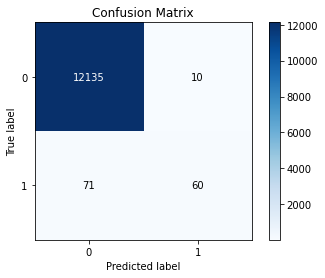

In [15]:
# Perceptron Multicapa
%time time.sleep(1)
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_predicted = nn.predict(X_test)
print(nn.score(X_test, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

In [16]:
# Funcion auxliar para obtener metricas
from sklearn import metrics
def print_evaluate(true,predicted):
    mae = metrics.mean_absolute_error(true,predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true,predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('\nMAE:', mae)
    print('\nMSE:', mse)
    print('\nRMSE:', rmse)
    print('\nR2 Square', r2_square)

In [29]:
# Random forest
%time time.sleep(1)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print(random_forest.score(X_test, y_test))
print_evaluate(y_test,random_forest.predict(X_test))

CPU times: user 507 µs, sys: 1.04 ms, total: 1.55 ms
Wall time: 1 s
0.9961713913326816

MAE: 0.003828608667318345

MSE: 0.003828608667318345

RMSE: 0.06187575185255

R2 Square 0.637351468734974


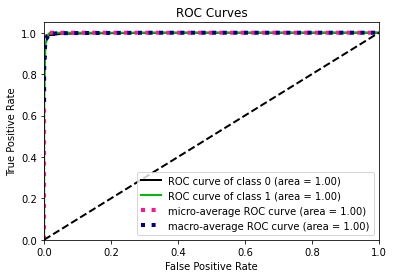

In [18]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_predicted = random_forest.predict(X_test)
skplt.metrics.plot_roc(y_test, random_forest.predict_proba(X_test))
plt.show()

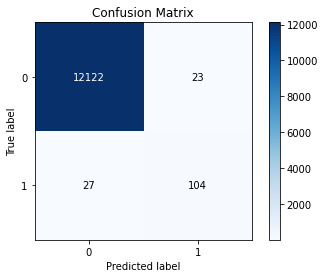

In [19]:
import scikitplot as skplt
y_predicted = random_forest.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predicted)

# Entrenamiento ajustando los hiperparametros

* Ajusta los parámetros de los 3 modelos anteriores realizando una busqueda en al menos dos parametros.
* Presenta los resultados sobre los conjuntos de entrenamiento y test

In [20]:
# Regresion Logistica
# Parametros a buscar C y solver (newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’)
C = [int(x) for x in np.linspace(start = 1, stop = 100, num = 10)]
random_grid = {'C': C,
               'solver':('newton-cg','lbfgs','liblinear','sag','saga')
              }
random_grid
%time time.sleep(1)
logistic = LogisticRegression()
logistic_RandomizedSearchCV = RandomizedSearchCV(estimator = logistic, 
                                           param_distributions = random_grid, 
                                           n_iter = 100, 
                                           cv = 3, 
                                           verbose=0, 
                                           random_state=42, 
                                           n_jobs = -1)
logistic_RandomizedSearchCV.fit(X_train, y_train)
logistic_RandomizedSearchCV.best_params_

CPU times: user 434 µs, sys: 794 µs, total: 1.23 ms
Wall time: 1 s


{'solver': 'newton-cg', 'C': 1}

CPU times: user 415 ms, sys: 5.04 ms, total: 420 ms
Wall time: 1 s
0.9904108489809019
0.991365265558814


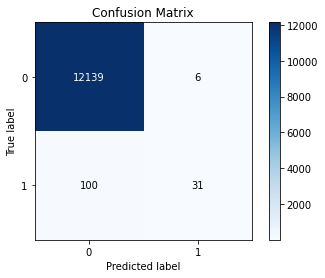

In [21]:
%time time.sleep(1)
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
logistic2 = LogisticRegression(C=1.0,solver='newton-cg')
logistic2.fit(X_train, y_train)

print(logistic2.score(X_train, y_train))
print(logistic2.score(X_test, y_test))

y_predicted2 = logistic2.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predicted2)

In [22]:
# Perceptron Multicapa
# Parametros a buscar activation y solver

random_grid = {'activation': ('identity', 'logistic', 'tanh', 'relu'),
               'solver':('newton-cg','lbfgs','liblinear','sag','saga')
              }
random_grid

%time time.sleep(1)
nn = MLPClassifier()
nn_RandomizedSearchCV = RandomizedSearchCV(estimator = nn, 
                                           param_distributions = random_grid, 
                                           n_iter = 100, 
                                           cv = 3, 
                                           verbose=0, 
                                           random_state=42, 
                                           n_jobs = -1)
nn_RandomizedSearchCV.fit(X_train, y_train)
nn_RandomizedSearchCV.best_params_

CPU times: user 739 µs, sys: 1.34 ms, total: 2.07 ms
Wall time: 1 s


{'solver': 'lbfgs', 'activation': 'tanh'}

CPU times: user 418 ms, sys: 5.39 ms, total: 423 ms
Wall time: 1 s
0.9930759204952754


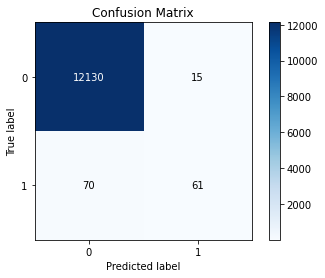

In [23]:
%time time.sleep(1)
from sklearn.neural_network import MLPClassifier
nn2 = MLPClassifier(solver='lbfgs',activation='logistic')
nn2.fit(X_train, y_train)
y_predicted_nn = nn2.predict(X_test)
print(nn2.score(X_test, y_test))
skplt.metrics.plot_confusion_matrix(y_test, y_predicted_nn)

In [24]:
# Random Forest
# Parametros a buscar n_estimators y max_depth
n_estimator = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
random_grid = {'n_estimators': n_estimator,
               'max_depth':(1,10,100,1000)
              }
random_grid

%time time.sleep(1)
rf =  RandomForestClassifier()
rf_RandomizedSearchCV = RandomizedSearchCV(estimator = rf, 
                                           param_distributions = random_grid, 
                                           n_iter = 100, 
                                           cv = 3, 
                                           verbose=0, 
                                           random_state=42, 
                                           n_jobs = -1)
rf_RandomizedSearchCV.fit(X_train, y_train)
rf_RandomizedSearchCV.best_params_

CPU times: user 766 µs, sys: 1.01 ms, total: 1.78 ms
Wall time: 1 s


{'n_estimators': 556, 'max_depth': 10}

In [25]:
# Random forest
%time time.sleep(1)
from sklearn.ensemble import RandomForestClassifier
random_forest2 = RandomForestClassifier(n_estimators=123,max_depth=10)
random_forest2.fit(X_train, y_train)
print(random_forest2.score(X_test, y_test))
print_evaluate(y_test,random_forest2.predict(X_test))

CPU times: user 482 µs, sys: 860 µs, total: 1.34 ms
Wall time: 1 s
0.9959270120560443

MAE: 0.004072987943955686

MSE: 0.004072987943955686

RMSE: 0.06381996508895697

R2 Square 0.6142036901435893


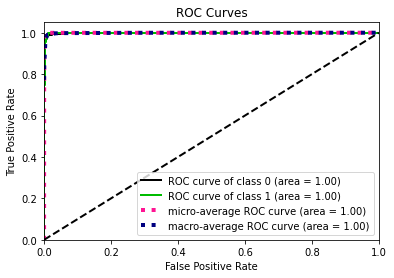

In [26]:
import scikitplot as skplt
import matplotlib.pyplot as plt
y_predicted = random_forest2.predict(X_test)
skplt.metrics.plot_roc(y_test, random_forest2.predict_proba(X_test))
plt.show()

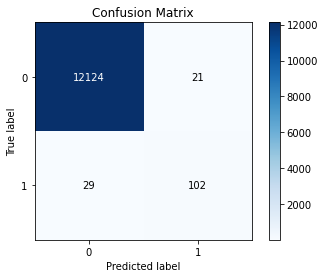

In [27]:
y_predicted_rf = random_forest2.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_predicted_rf)

# Conclusiones

* Que conclusiones obtienes
* Tiempos de entrenamiento?
* Merece siempre la pena?

In [28]:
# De los tres modelos que he escogido, el mejor scoring lo tiene el RandomForestClassifier (siendo incluso un poco mejor el modelo base que el tuneado con dos hiperparmetros)
# Si atendemos a la matriz de confusion, tambien RandomForest seria el mas adecuado, puesto que tiene el numero mas bajo de casos en que el valor real es OK, y lo clasifico como BAD.
# La principal conclusion que obtengo es que no siempre la busqueda de hiperparametros es rentable, en ocasiones la parametrizacion por defecto es suficiente para 
# obtener unos buenos resultados e incluso en alguna ocasion el modelo base o por defecto es superior.

# Los tiempos de entrenamiento son ligeramente mayores cuando usamos los hiperparamtros. 